In [148]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1= nn.Linear(1,6)
        self.fc2 = nn.Linear(6,10)
        self.fc3 = nn.Linear(10,4)
        self.fc4 = nn.Linear(4,1)

    def forward(self, x):
        x = F.relu(self.fc1(x.float()))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return 5*torch.sigmoid(x)

model = Net()

In [155]:
class TwoClusterNN:
    def __init__(self, n_observations=None, device=None, dtype=None):
        self.device = device
        self.dtype = dtype
        self.n_observations = n_observations
        self.model = Net()

    def get_parameters(self):
        return list(set(self.model.parameters()))

    def calculate_R(self,x):
        R = self.model(x)
        return R

    def calculate_loss(self):
        return None

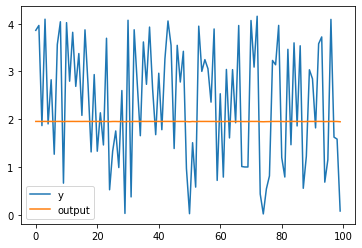

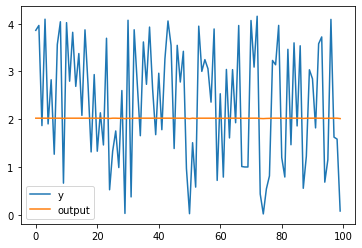

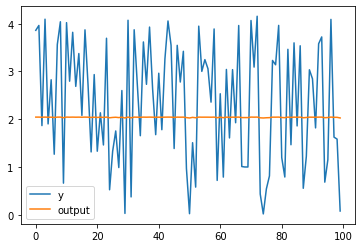

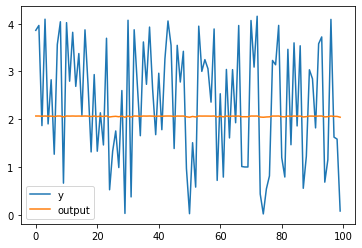

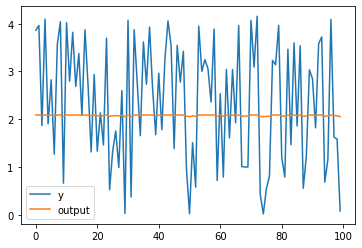

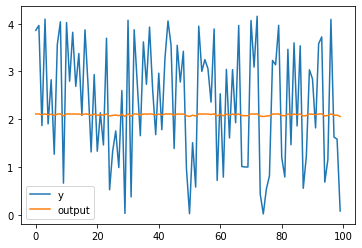

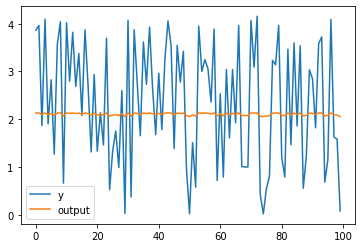

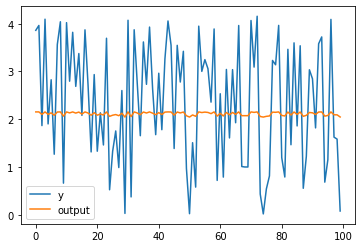

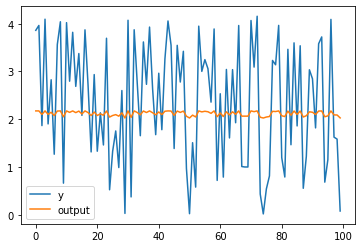

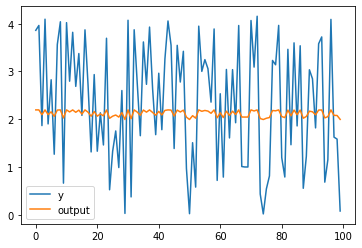

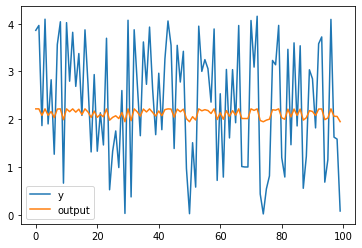

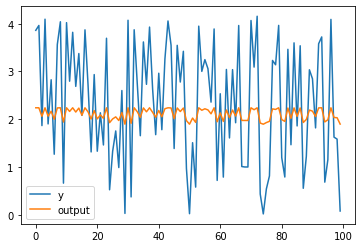

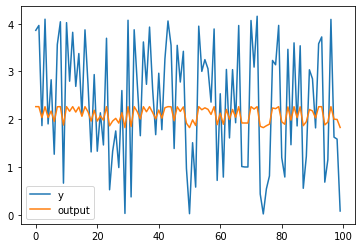

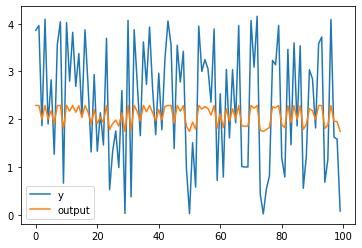

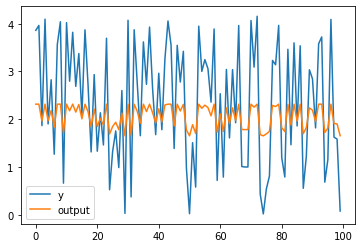

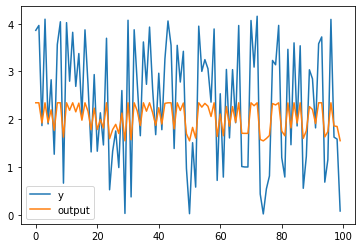

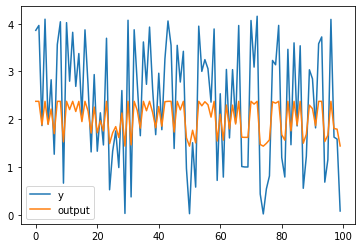

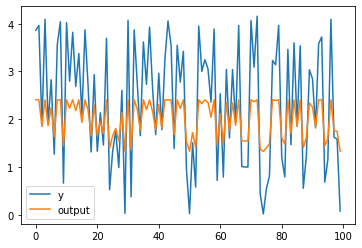

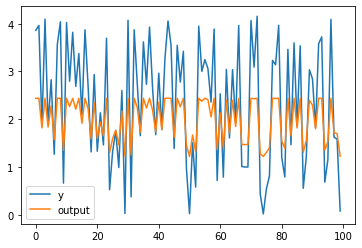

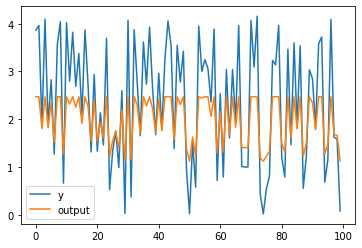

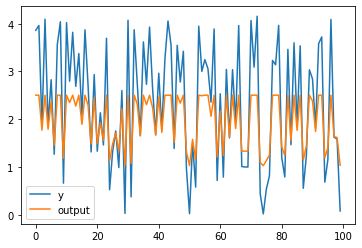

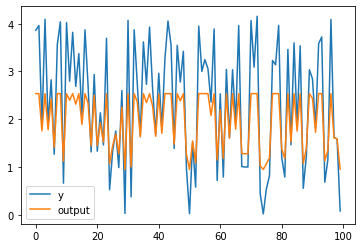

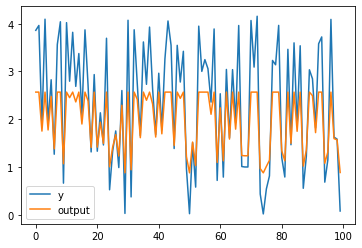

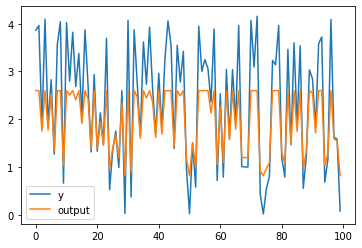

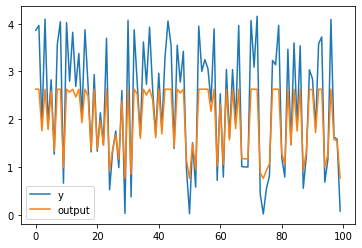

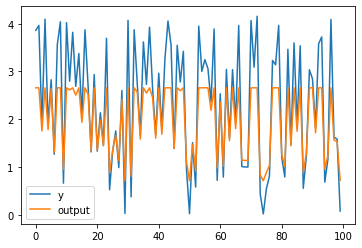

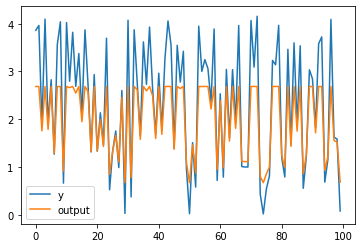

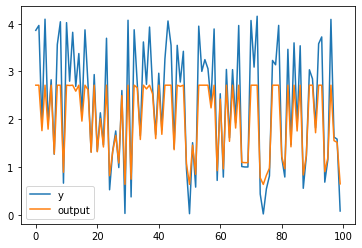

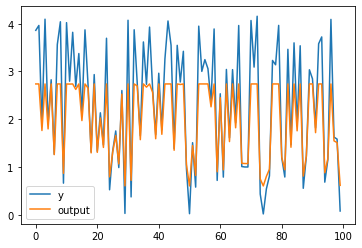

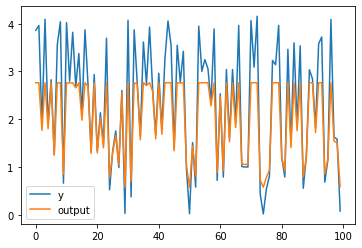

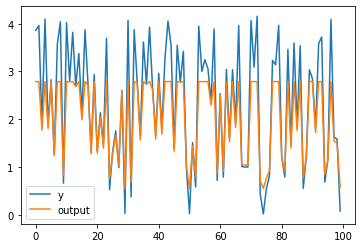

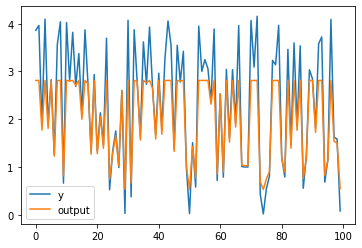

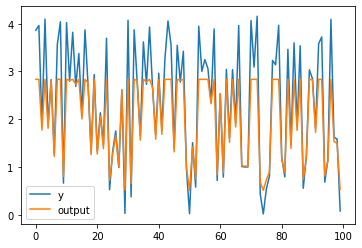

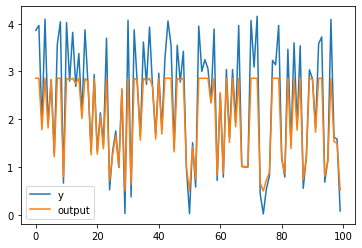

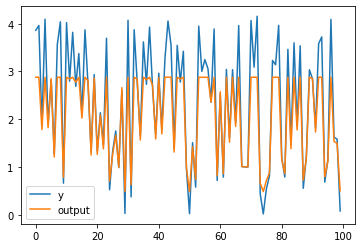

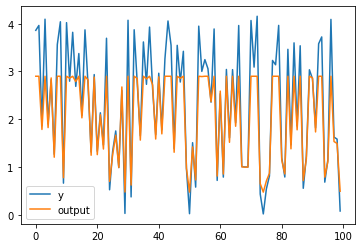

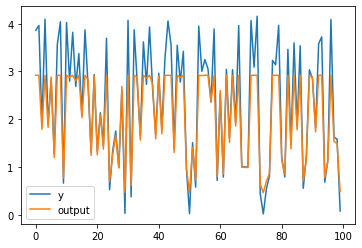

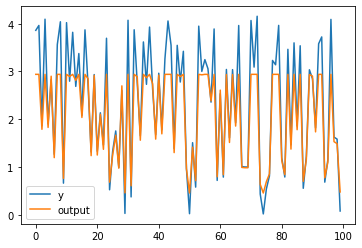

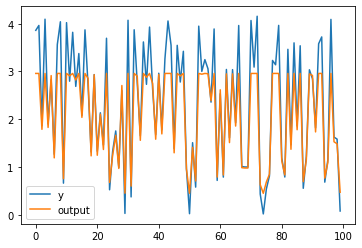

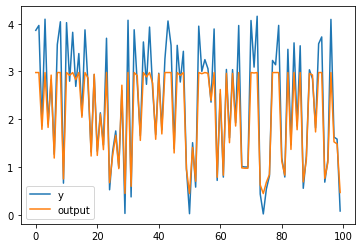

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [156]:
from torch.optim import Adam
method = TwoClusterNN()
criterion = nn.MSELoss()
EPOCHS = 20000
optimizer = Adam(method.get_parameters(), lr = 0.001)
torch.manual_seed(42)
x = torch.rand(100,1)
y = 5*torch.sin(x)

for i in range(EPOCHS):
    method.model.zero_grad()
    output = method.calculate_R(x)
    loss =criterion(output,y)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        if i%20==0:
            plt.plot(y,label='y')
            plt.plot(output,label='output')
            plt.legend()
            plt.show()